# GUC NETW 1003 Kmeans Assginmnet 

Objective: exercise is to learn how to use build and use  kmeans clustering algortrithm    

At the end of this lab you will be able to
> 1. Build and run a K-means algorithm.
> 2. Know how to evalute K-means Algorithm 
> 2. Understand the effect of the parmeters ont he perfromance of the algorithm .
> 3. Understand the effect of distance.

## 1. Wirte K means function 

import required libraries 

In [27]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

> ### 1.1. Code for the distance function 

write a function to calculate the distance between a set of cluster centroids and all the data points 

Cluster_Distances = GUC_Distance ( Cluster_Centroids, Data_points, Distance_Type) 
* The function shoud be able to handel data points with any number of features and any number of points 
* The function should be able to handle any K number of cluster centroids 
* To inrease speed do that in matrix format using numpy
* This should produce a matrix with rows equal to data points columns equal K 
* You should be able to calculate different types of Distance. In this assginmnet you are required to implement the following two 
    - Ecluidian distance
    - Pearson correlation distance
  

In [28]:
def GUC_Distance(Cluster_Centroids, Data_points, Distance_Type):
    

    num_points = Data_points.shape[0]
    K = Cluster_Centroids.shape[0]
    num_features = Data_points.shape[1]

    Cluster_Distances = np.zeros((num_points, K))

    if Distance_Type == 'Euclidean':
        for k in range(K):
            centroid = Cluster_Centroids[k, :]
            diff = Data_points - centroid
            distances = np.sqrt(np.sum(diff**2, axis=1))
            Cluster_Distances[:, k] = distances
    elif Distance_Type == 'Pearson':
        for k in range(K):
            centroid = Cluster_Centroids[k, :]
            centroid_mean = np.mean(centroid)
            centroid_std = np.std(centroid)
            distances = np.zeros(num_points)
            for i in range(num_points):
                data_point = Data_points[i, :]
                data_point_mean = np.mean(data_point)
                data_point_std = np.std(data_point)
                covariance = np.sum((data_point - data_point_mean) * (centroid - centroid_mean))
                correlation = covariance / (num_features * data_point_std * centroid_std)
                
                distances[i] = 1 - correlation  # Pearson correlation distance
            Cluster_Distances[:, k] = distances
    else:
        raise ValueError("Invalid Distance_Type. Use 'Euclidean' or 'Pearson'.")

    return Cluster_Distances


> ### 1.2. Code for K means function 

> Loop until a stopping condition 

> > in the loop do the following 
> > 1. Cluster Assginmnet 
> > > * Use the GUC_Distance to calculate between each cluster head and all the points 
> > > * Find the value and index of the minimum distance  for each row. 
> > > * for each point in the row use the index of the minmum distance to represent the cluster Centroid that this point will belong to.
> > > * Calculate and record the mean square distance for each cluster  
> > > * Use the mean square distances to calculate a stopping condition (e.g the sum of mean distances)
> > 2. Updtate Centroids  
> > > * Update the value for the cluster heads by calculating the mean value for the points in each cluster 
> > >  * Calculate the Cluster Metric (Distortion Function)
> > > > a number indicating the how good the clusters are . An example cluster metric is the  (sum of squared error between each point and its cluster center) 

In [44]:
def GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type):
    tol = 1e-4

    # Initializing centroids randomly
    Cluster_Centroids = np.random.rand(Number_of_Clusters, Data_points.shape[1])

    # Cluster Assignment
    distances = GUC_Distance(Cluster_Centroids, Data_points, Distance_Type)
    cluster_assignments = np.argmin(distances, axis=1)

    # Calculate mean square distance for each cluster
    cluster_distances = np.min(distances, axis=1)
    mean_square_distance = np.mean(cluster_distances)

    distortion = 0
    prev_cluster_centroids = np.copy(Cluster_Centroids)

    # Updating Centroids
    while True:
        centroid_counts = np.bincount(cluster_assignments, minlength=Number_of_Clusters)
        for i in range(Number_of_Clusters):
            points_in_cluster = Data_points[cluster_assignments == i]
            if len(points_in_cluster) > 0:
                distortion += np.sum((points_in_cluster - Cluster_Centroids[i])**2)
                Cluster_Centroids[i] = np.mean(points_in_cluster, axis=0)

        # Check for convergence
        if np.linalg.norm(Cluster_Centroids - prev_cluster_centroids) < tol:
            break

        prev_cluster_centroids = np.copy(Cluster_Centroids)

    return [mean_square_distance, distortion]


# Example:
num_data_points = 100
num_features = 2
Data_points = np.random.rand(num_data_points, num_features)
Number_of_Clusters = 3
Distance_Type = 'Euclidean'

final_cluster_distance, cluster_metric = GUC_Kmean(Data_points, Number_of_Clusters, Distance_Type)
print("Final Cluster Distance:", final_cluster_distance)
print("Cluster Metric (Distortion Function):", cluster_metric)


Final Cluster Distance: 0.3741886304518082
Cluster Metric (Distortion Function): 26.51363775002746


## 2. Display Results 

* below is a an example fuction that displayes Clusters in 2D 

* You need to change the function so that is can display an n dimension data in the form of pairs of subplot 2D figures 

* The function is a helper function that is originaly be found in 
https://www.coursera.org/learn/ibm-unsupervised-learning/


In [3]:
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

> #### 2.1. helper Display function 

In [32]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [33]:
def display_cluster_ND(X, km=[], num_clusters=0):
    color = 'brgcmyk'  
    alpha = 0.5  
    s = 20  

    num_dimensions = X.shape[1]  # Get the number of dimensions

    if num_dimensions == 2:
        fig, ax = plt.subplots(figsize=(6, 6))
        ax.set_title('Dimensions 1 vs 2')
        if num_clusters == 0:
            ax.scatter(X[:, 0], X[:, 1], c='b', alpha=alpha, s=s)
        else:
            for k in range(num_clusters):
                ax.scatter(X[km == k, 0], X[km == k, 1], c=color[k], alpha=alpha, s=s)
    else:
        fig, axs = plt.subplots(num_dimensions - 1, num_dimensions - 1, figsize=(15, 15))
        for i in range(num_dimensions - 1):
            for j in range(i + 1, num_dimensions):
                ax = axs[i, j-1]  # Selecting the subplot
                ax.set_title(f'Dimensions {i+1} vs {j+1}') 
                if num_clusters == 0:
                    ax.scatter(X[:, i], X[:, j], c='b', alpha=alpha, s=s)
                else:
                    for k in range(num_clusters):
                        ax.scatter(X[km == k, i], X[km == k, j], c=color[k], alpha=alpha, s=s)

    plt.tight_layout()
    plt.show()

> #### 2.2. Example 1 : Circular Data Gen and display 

* below is an example of how to use the funciton 
  *  prepare the figure size and background 
   > * this part can be replaced by a number of subplots 
  
  * Produce a data set that represent the x and y o coordinates of a circle 
   > * this part can be replaced by data that you import froma file 
  
  * Data is displayed 
   > * to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 

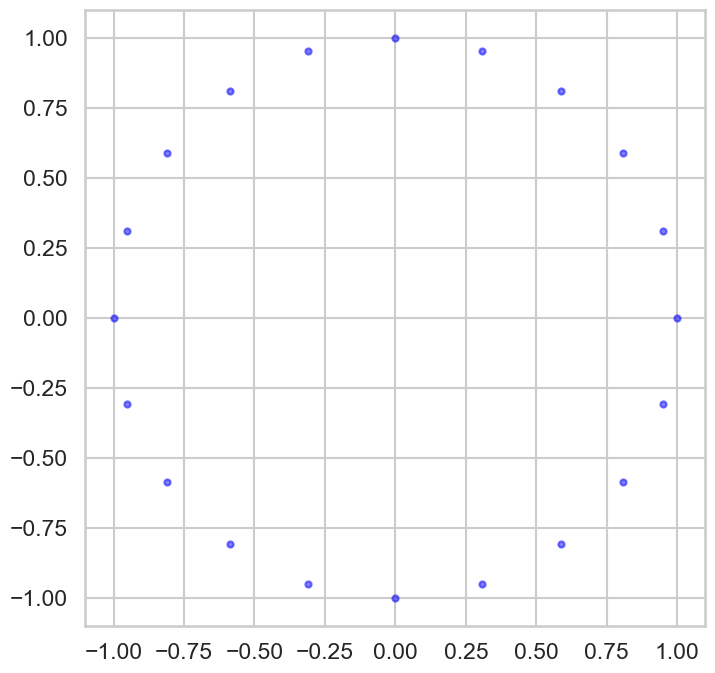

In [34]:
# prepare the figure sise and background 
# this part can be replaced by a number of subplots 
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")
# Produce a data set that represent the x and y o coordinates of a circle 
# this part can be replaced by data that you import froma file 
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X1 = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
# Data is displayed 
# to display the data only it is assumed that the number of clusters is zero which is the default of the fuction 
display_cluster(X1)

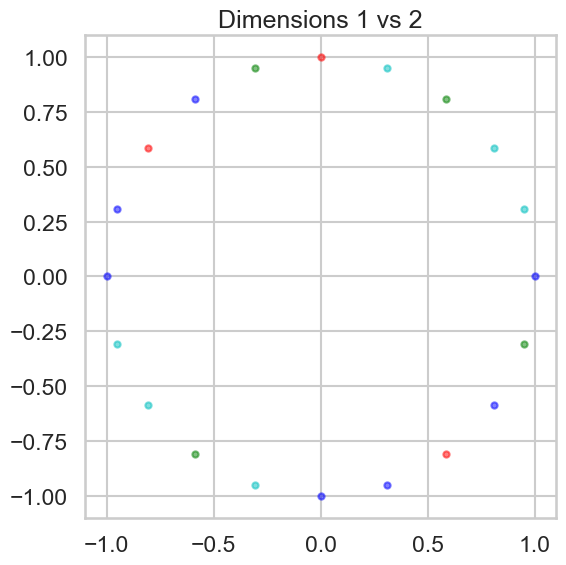

In [134]:
km = np.random.randint(0, num_clusters, size=len(X1))
display_cluster_ND(X1, km=km, num_clusters=4)

> #### 2.3. Example 2 : Multi blob Data Gen and display 

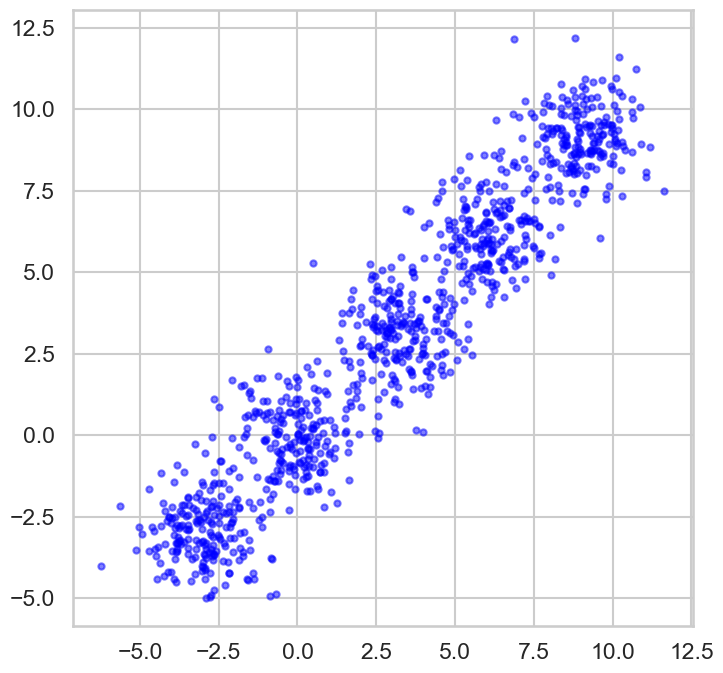

In [35]:
n_samples = 1000
n_bins = 4  
centers = [(-3, -3), (0, 0), (3, 3), (6, 6), (9,9)]
X2, _ = make_blobs(n_samples=n_samples, n_features=2, cluster_std=1.0,
                  centers=centers, shuffle=False, random_state=42)
display_cluster(X2)

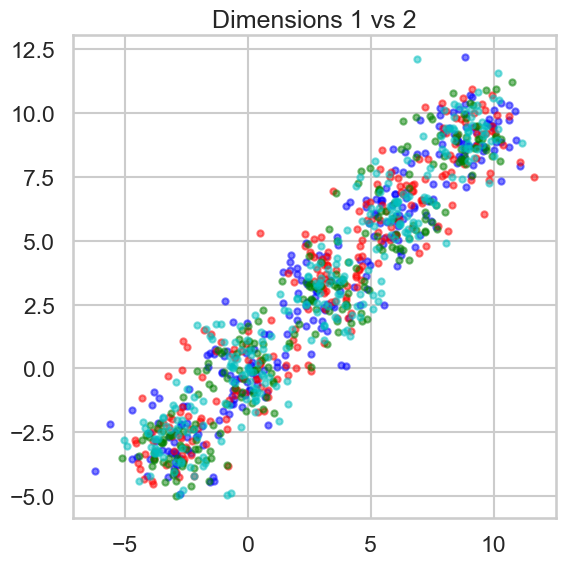

In [16]:
np.random.seed(42)
num_clusters = 4
km = np.random.randint(0, num_clusters, size=len(X2))
display_cluster_ND(X2, km=km, num_clusters=num_clusters)

#### 2.3. Example 3 : moons Data Gen and display 

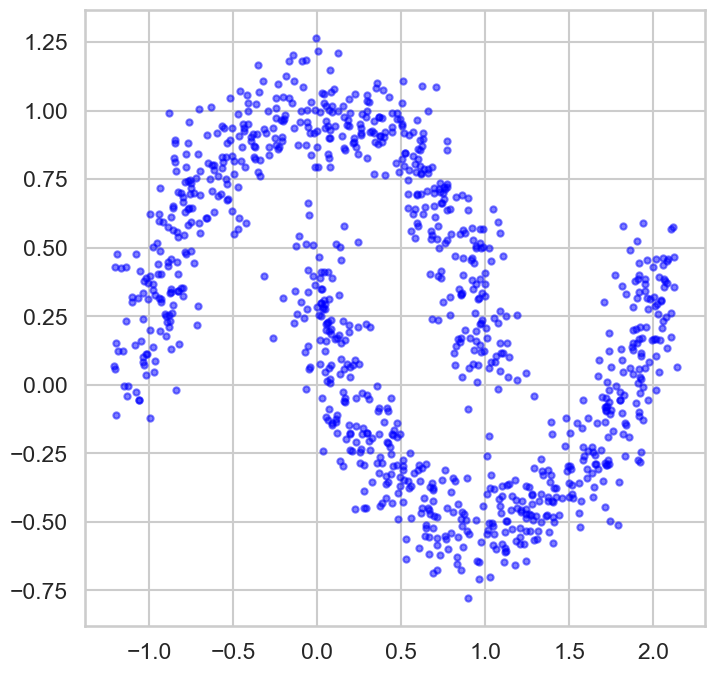

In [36]:
n_samples = 1000
X3, _ = noisy_moons = make_moons(n_samples=n_samples, noise= .1)
display_cluster(X3)

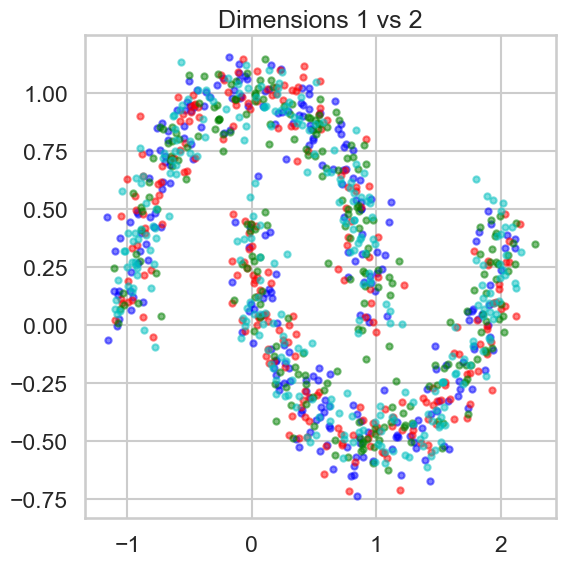

In [135]:
np.random.seed(42)
num_clusters = 4
km = np.random.randint(0, num_clusters, size=len(X3))
display_cluster_ND(X3, km=km, num_clusters=num_clusters)

## 3. Testing the GUC_Kmean function on Simple 2D
1. Apply the GUC_Kmean fucntion to 2D Data provided by example 1, Example 2 and Example 3
2. Try a varing number of cluster centriods that range from 2 to 10 clusters on each set 
3. Display your results.
4. plot the Cluster perfromance Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

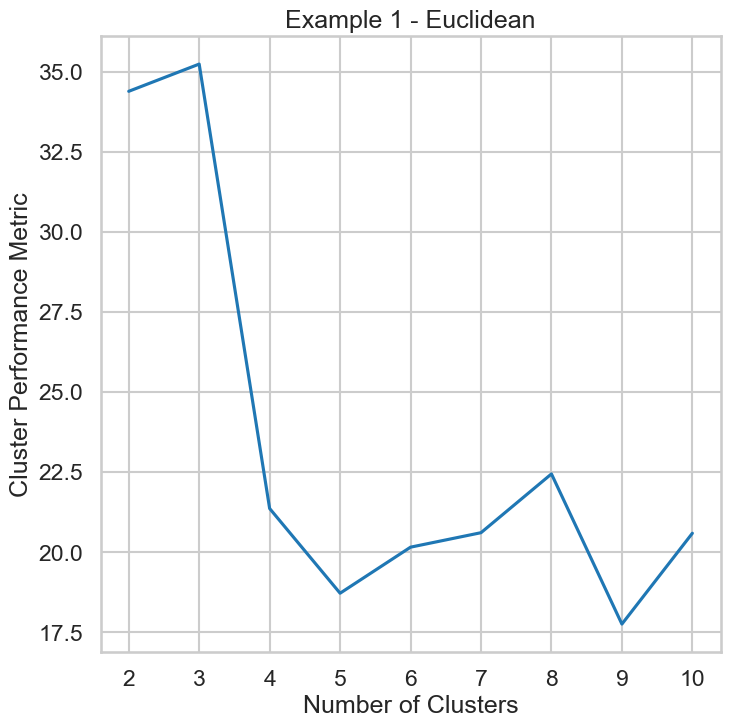

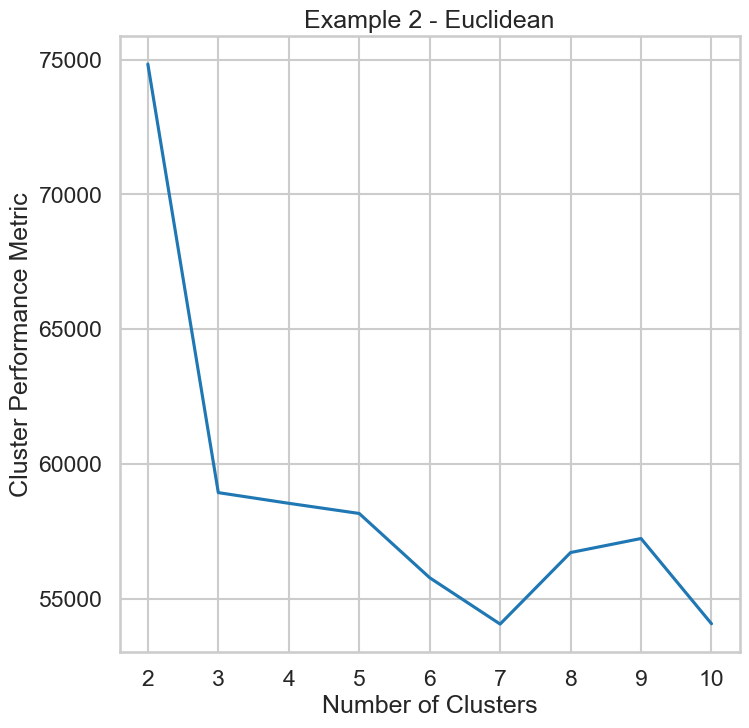

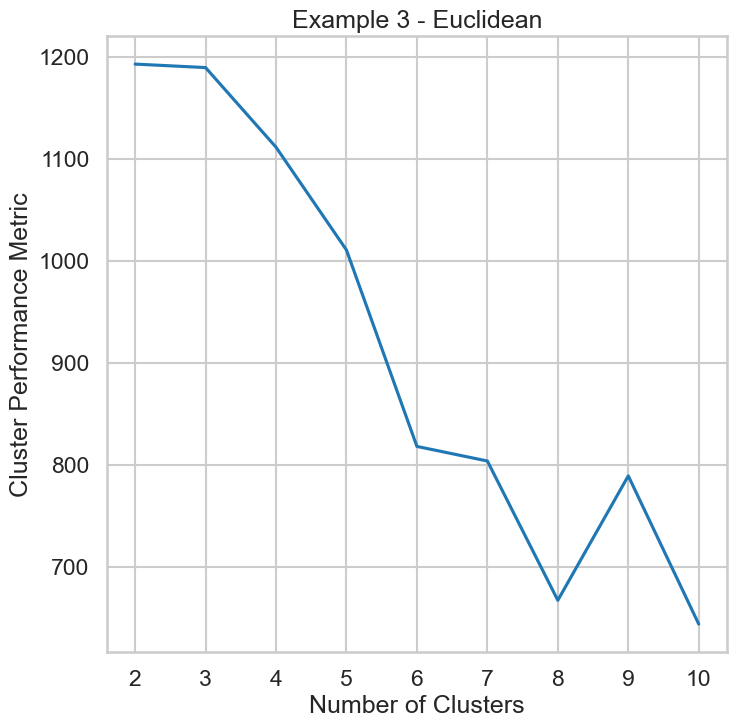

In [53]:
datasets = [(X1, 'Example 1'), (X2, 'Example 2'), (X3, 'Example 3')]
#distance_types = ['Euclidean', 'Pearson']
for X, title in datasets:
    #for distance_type in distance_types:
        metrics = []
        for n_clusters in range(2, 11):
            mean_square_distance, distortion = GUC_Kmean(X, n_clusters, "Euclidean")
            metrics.append(distortion)
        plt.figure()
        plt.plot(range(2, 11), metrics)
        plt.xlabel('Number of Clusters')
        plt.ylabel('Cluster Performance Metric')
        #plt.title(f'{title} - {distance_type}')
        plt.title(f'{title} - Euclidean')
        
        plt.show()

## 4. Using the GUC_Kmean function to segment customers int he provided customer dataset
1. Apply the GUC_Kmean fucntion to customer data  
2. Try a varing number of cluster that range from 2 to 10 cluster on each set 
3. Display your results.
4. plot the Cluster Metric versus the number of clusters
4. Change the distance function and repeat the above steps 

In [55]:
df= pd.read_csv(r'D:\Sems10\ML\Customer data.csv')

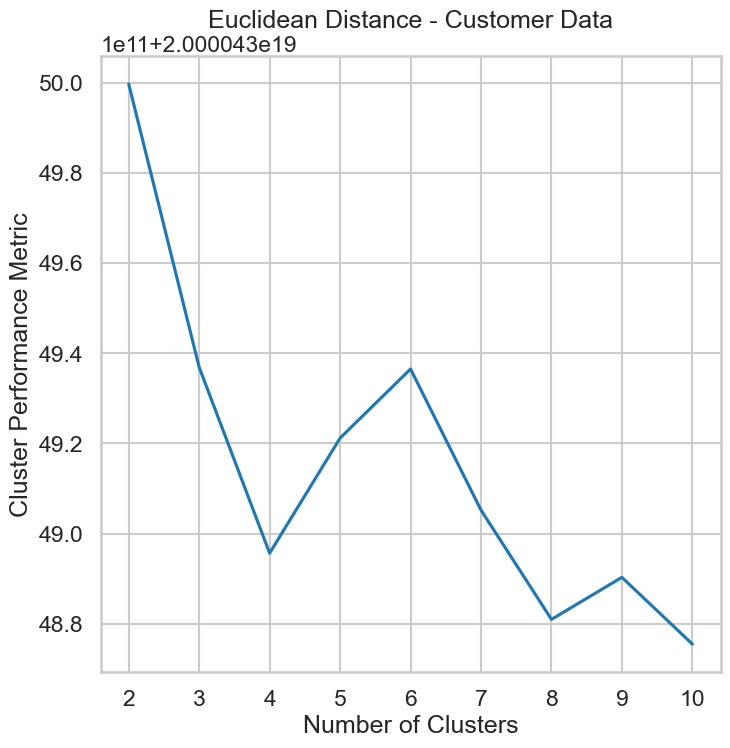

In [68]:
metrics = []
for n_clusters in range(2, 11):
    mean_square_distance, distortion = GUC_Kmean(df.values, n_clusters, "Euclidean")
    metrics.append(distortion)

plt.figure()
plt.plot(range(2, 11), metrics)
plt.xlabel('Number of Clusters')
plt.ylabel('Cluster Performance Metric')
plt.title('Euclidean Distance - Customer Data')
plt.show()